In [1]:
import ROOT as root
import numpy as np
import random
from timer import Timer

t = Timer()
t.start()

In [2]:
fileName = "data/AnaBarMC_7001.root"
treeName = "T"

f = root.TFile(fileName)
myTree = f.Get(treeName)

myTree.Print()

root.EnableImplicitMT()
d = root.RDataFrame(treeName,fileName)

myGeometryData = myTree.GetUserInfo().FindObject("myGeometryData")

******************************************************************************
*Tree    :T         : Output Tree                                            *
*Entries :     2504 : Total =      1504490465 bytes  File  Size =    8833235 *
*        :          : Tree compression factor = 171.39                       *
******************************************************************************
*Br    0 :Prim_E    : Prim_E/F                                               *
*Entries :     2504 : Total  Size=      10575 bytes  File Size  =       9040 *
*Baskets :        1 : Basket Size=      32000 bytes  Compression=   1.12     *
*............................................................................*
*Br    1 :Prim_X    : Prim_X/F                                               *
*Entries :     2504 : Total  Size=      10575 bytes  File Size  =       9349 *
*Baskets :        1 : Basket Size=      32000 bytes  Compression=   1.08     *
*...................................................

In [3]:
#myGeometryData.Print()
print(myGeometryData[0])
print(myGeometryData[0][0])
print(myGeometryData[0][1])
print(myGeometryData[0][2])
print(myGeometryData[0][3])
print(myGeometryData[1][0])
print(myGeometryData[1][1])
print(myGeometryData[1][2])
print(myGeometryData[1][3])
print(len(myGeometryData))
type(myGeometryData)

Name: TVectorT<double> Title: 
0.0
450.0
0.0
-2.5
1.0
-52.0
0.0
-2.5
2


<class cppyy.gbl.TList at 0x154b5e210>

In [4]:
root.gInterpreter.ProcessLine('#include "AnalyseSignalsRDataFrameNoKE.h"')

0

In [5]:
fdf = d.Define("trigger", "getTrigger(Detector_Nhits, &Detector_id[0])") \
       .Define("fMass", "getMass(Prim_pdg)") \
       .Define("fMomentum","getMomentum(Prim_E,fMass)") \
       .Define("fPx", "getPx(fMomentum,Prim_Th,Prim_Ph)") \
       .Define("fPy", "getPy(fMomentum,Prim_Th,Prim_Ph)") \
       .Define("fPz", "getPz(fMomentum,Prim_Th,Prim_Ph)") \
       .Define("fNewTheta", "getNewTheta(fMomentum,fPy)") \
       .Define("fNewPhi", "getNewPhi(fMomentum,fPx,fPz)") \
       .Define("trigger2", "getTrigger2(trigger,fNewTheta)") \
       .Define("trigger3", "getTrigger3(trigger,fNewTheta)") \
       .Define("fingerXVec","getFingerXVec(trigger,Detector_Nhits,&Detector_id[0],&Detector_pdg[0],&Detector_x[0],Prim_pdg)") \
       .Define("fingerYVec","getFingerYVec(trigger,Detector_Nhits,&Detector_id[0],&Detector_pdg[0],&Detector_y[0],Prim_pdg)") \
       .Define("fingerZVec","getFingerZVec(trigger,Detector_Nhits,&Detector_id[0],&Detector_pdg[0],&Detector_z[0],Prim_pdg)") \
       .Define("fingerTVec","getFingerTVec(trigger,Detector_Nhits,&Detector_id[0],&Detector_pdg[0],&Detector_t[0],Prim_pdg)") \
       .Define("anaBarXVec","getAnaBarXVec(trigger,Detector_Nhits,&Detector_id[0],&Detector_pdg[0],&Detector_x[0],Prim_pdg)") \
       .Define("anaBarYVec","getAnaBarYVec(trigger,Detector_Nhits,&Detector_id[0],&Detector_pdg[0],&Detector_y[0],Prim_pdg)") \
       .Define("anaBarZVec","getAnaBarZVec(trigger,Detector_Nhits,&Detector_id[0],&Detector_pdg[0],&Detector_z[0],Prim_pdg)") \
       .Define("anaBarTVec","getAnaBarTVec(trigger,Detector_Nhits,&Detector_id[0],&Detector_pdg[0],&Detector_t[0],Prim_pdg)") \
       .Define("fingerID","getFingerID(trigger,Detector_Nhits,&Detector_id[0],&Detector_pdg[0])") \
       .Define("fingerPDG","getFingerPDG(trigger,Detector_Nhits,&Detector_id[0],&Detector_pdg[0])") \
       .Define("anaBarID","getAnaBarID(trigger,Detector_Nhits,&Detector_id[0],&Detector_pdg[0])") \
       .Define("anaBarPDG","getAnaBarPDG(trigger,Detector_Nhits,&Detector_id[0],&Detector_pdg[0])") \
       .Define("anaBarPMTID","getAnaBarPMTID(trigger,&PMT_Nphotons[0])") \
       .Define("fingerPMTID","getFingerPMTID(trigger,&PMT_Nphotons[0])") \
       .Define("fingerPMTNPhotons","getFingerPMTNPhotons(trigger,&PMT_Nphotons[0])") \
       .Define("anaBarPMTNPhotons","getAnaBarPMTNPhotons(trigger,&PMT_Nphotons[0])") \
       .Define("anaBarXPMT","getAnaBarXPMT(trigger,&PMT_Nphotons[0],&PMT_Time[0])") \
       .Define("anaBarZPMT","getAnaBarZPMT(trigger,&PMT_Nphotons[0],&PMT_Time[0])") \
       .Define("anaBarPXPMT","getAnaBarPXPMT(trigger,&PMT_Nphotons[0],&PMT_Time[0])") \
       .Define("anaBarPZPMT","getAnaBarPZPMT(trigger,&PMT_Nphotons[0],&PMT_Time[0])") \
       .Define("fingerPMTTime","getFingerPMTTime(trigger,&PMT_Nphotons[0],&PMT_Time[0])") \
       .Define("fingerAngleRad","getFingerAngleRad(trigger,&PMT_Nphotons[0],&PMT_Time[0])") \
       .Define("anaBarPMTTime","getAnaBarPMTTime(trigger,&PMT_Nphotons[0],&PMT_Time[0])") \
       .Define("anaBarPMTTimeOverThreshold","getAnaBarPMTTimeOverThreshold(trigger,&PMT_Nphotons[0],&PMT_TimeOverThreshold[0])") \
       .Define("anaBarPMTTimeTop","getAnaBarPMTTimeTop(trigger,&PMT_Nphotons[0],&PMT_Time[0])") \
       .Define("anaBarPMTTimeBottom","getAnaBarPMTTimeBottom(trigger,&PMT_Nphotons[0],&PMT_Time[0])") \
       .Define("anaBarNPhotonsTotal","getAnaBarNPhotonsTotal(trigger,&PMT_Nphotons[0])") \
       .Define("imult","getAnaBarMult(trigger,&PMT_Nphotons[0])") \
       .Define("fingerEd","getFingerEd(trigger,fNewTheta,Detector_Nhits,Prim_pdg,&Detector_id[0],&Detector_pdg[0],&Detector_Ed[0])") \
       .Define("anaBarEd","getAnaBarEd(trigger,fNewTheta,Detector_Nhits,Prim_pdg,&Detector_id[0],&Detector_pdg[0],&Detector_Ed[0])") \
       .Define("anaBarEdTotal","getAnaBarEdTotal(trigger,fNewTheta,Detector_Nhits,Prim_pdg,&Detector_id[0],&Detector_pdg[0],&Detector_Ed[0])")

triggers = fdf.Filter("trigger==true").Count()
print('{} entries passed trigger'.format(triggers.GetValue()))

fdft = fdf.Filter("trigger==true")

1664 entries passed trigger


Info in <TCanvas::Print>: pdf file plots/c1.pdf has been created


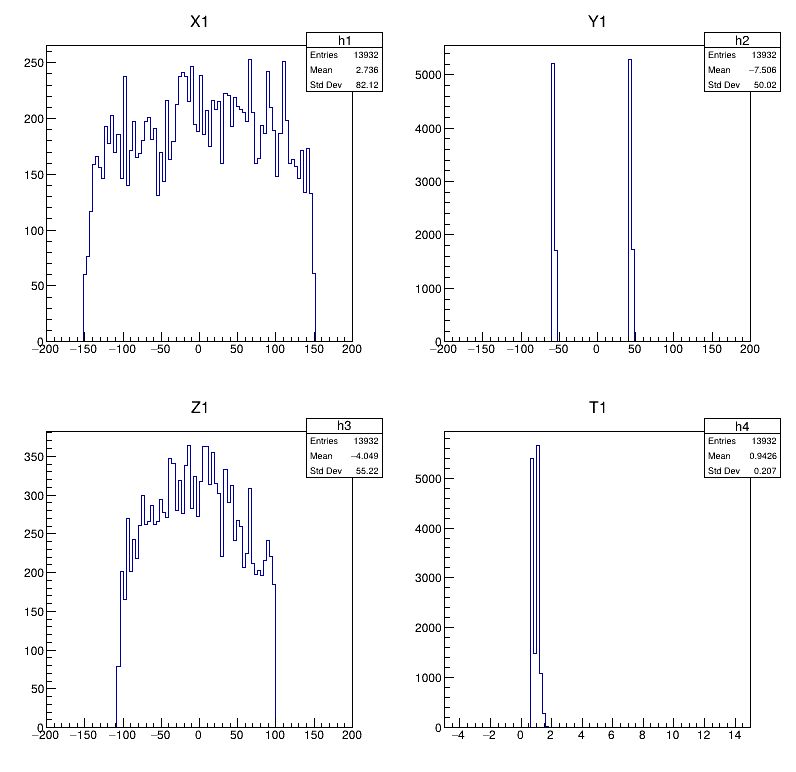

In [6]:
# Canvas 1
hFingerX = fdft.Histo1D(("h1", "X1", 100, -200.0, 200.0),'fingerXVec')
hFingerY = fdft.Histo1D(("h2", "Y1", 100, -200.0, 200.0),'fingerYVec')
hFingerZ = fdft.Histo1D(("h3", "Z1", 100, -200.0, 200.0),'fingerZVec')
hFingerT = fdft.Histo1D(("h4", "T1", 100, -5.0, 15.0),'fingerTVec')

c1 = root.TCanvas("c1","c1",800,800)
c1.Divide(2,2,0.01,0.01,0)

c1.cd(1)
hFingerX.Draw()
c1.cd(2)
hFingerY.Draw()
c1.cd(3)
hFingerZ.Draw()
c1.cd(4)
hFingerT.Draw()

c1.Draw()
c1.Print("plots/c1.pdf");

Info in <TCanvas::Print>: pdf file plots/c2.pdf has been created


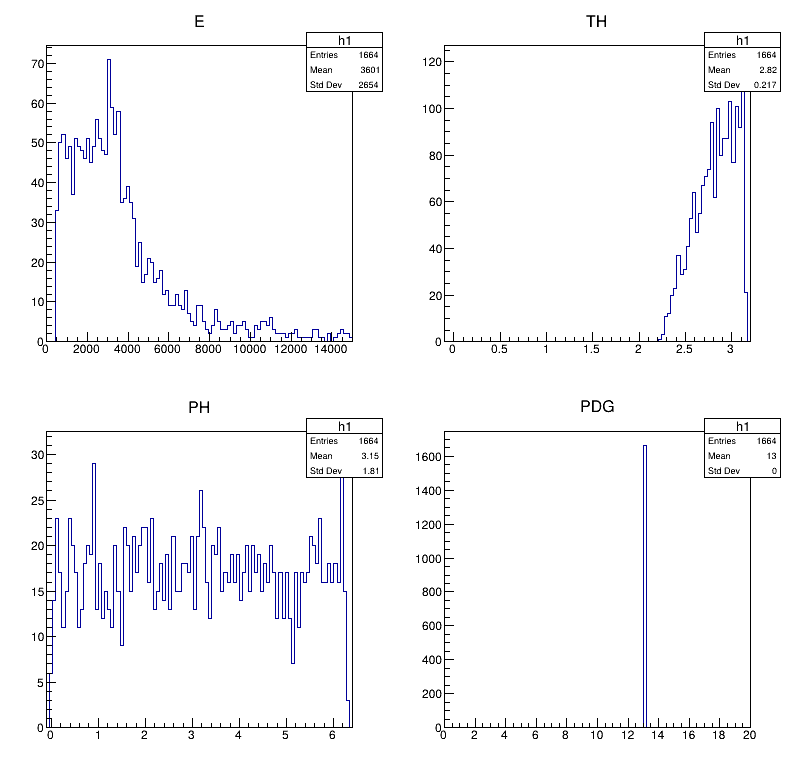

In [7]:
# Canvas 2

hPrimE = fdft.Histo1D(("h1", "E", 100, 0.0, 15000.0),'Prim_E')
hPrimTh = fdft.Histo1D(("h1", "TH", 100, -0.1, 3.2),'fNewTheta')
hPrimPh = fdft.Histo1D(("h1", "PH", 100, -0.1, 6.4),'fNewPhi')
hPrimPdg = fdft.Histo1D(("h1", "PDG", 100, 0.0, 20.0),'Prim_pdg')

c2 = root.TCanvas("c2","c2",800,800)
c2.Divide(2,2,0.01,0.01,0)

c2.cd(1)
hPrimE.Draw()
c2.cd(2)
hPrimTh.Draw()
c2.cd(3)
hPrimPh.Draw()
c2.cd(4)
hPrimPdg.Draw()

c2.Draw()
c2.Print("plots/c2.pdf")


In [8]:
def plotSinglePoints(hist):

    x1 = 60.0;
    y1 = 115.0;
    x2 = 70.0;
    y2 = 125.0;
    opacity = 0.9;
    rect7 = root.TBox(x1, y1, x2, y2);
    rect7.SetFillColorAlpha(3, opacity);
    hist.GetListOfFunctions().Add(rect7);
    x1 = 60.0;
    y1 = -115.0;
    x2 = 70.0;
    y2 = -125.0;
    opacity = 0.9;
    rect8 = root.TBox(x1, y1, x2, y2);
    rect8.SetFillColorAlpha(3, opacity);
    hist.GetListOfFunctions().Add(rect8);
    x1 = -35.0;
    y1 = -5.0;
    x2 = -45.0;
    y2 = 5.0;
    opacity = 0.9;
    rect9 = root.TBox(x1, y1, x2, y2);
    rect9.SetFillColorAlpha(3, opacity);
    hist.GetListOfFunctions().Add(rect9);
    x1 = -5.0;
    y1 = 55.0;
    x2 = 5.0;
    y2 = 65.0;
    opacity = 0.9;
    rect10 = root.TBox(x1, y1, x2, y2);
    rect10.SetFillColorAlpha(3, opacity);
    hist.GetListOfFunctions().Add(rect10);
    x1 = -5.0;
    y1 = -55.0;
    x2 = 5.0;
    y2 = -65.0;
    opacity = 0.9;
    rect11 = root.TBox(x1, y1, x2, y2);
    rect11.SetFillColorAlpha(3, opacity);
    hist.GetListOfFunctions().Add(rect11);
    x1 = 25.0;
    y1 = -85.0;
    x2 = 35.0;
    y2 = -95.0;
    opacity = 0.9;
    rect12 = root.TBox(x1, y1, x2, y2);
    rect12.SetFillColorAlpha(3, opacity);
    hist.GetListOfFunctions().Add(rect12);
    x1 = 25.0;
    y1 = 85.0;
    x2 = 35.0;
    y2 = 95.0;
    opacity = 0.9;
    rect13 = root.TBox(x1, y1, x2, y2);
    rect13.SetFillColorAlpha(3, opacity);
    hist.GetListOfFunctions().Add(rect13);

In [9]:
def plotDetector(hist):
    
    opacity=0.2
    x1 = 55.0
    y1 = -61.6
    x2 = -45.2
    y2 = -8.74
    rect1 = root.TBox(x1, y1, x2, y2)
    rect1.SetFillColorAlpha(2, opacity)
    hist.GetListOfFunctions().Add(rect1)
    x1 = 55.0
    y1 = -8.74
    x2 = -45.2
    y2 = 44.14
    rect2 = root.TBox(x1, y1, x2, y2)
    rect2.SetFillColorAlpha(2, opacity)
    hist.GetListOfFunctions().Add(rect2)
    x1 = 62.5
    y1 = -114.54
    x2 = -37.7
    y2 = -61.62
    rect3 = root.TBox(x1, y1, x2, y2)
    rect3.SetFillColorAlpha(2, opacity)
    hist.GetListOfFunctions().Add(rect3)
    x1 = 70.0
    y1 = -167.46
    x2 = -30.2
    y2 = -114.54
    rect4 = root.TBox(x1, y1, x2, y2);
    rect4.SetFillColorAlpha(2, opacity)
    hist.GetListOfFunctions().Add(rect4);
    x1 = 62.5
    y1 = 44.14
    x2 = -37.7
    y2 = 97.50
    rect5 = root.TBox(x1, y1, x2, y2)
    rect5.SetFillColorAlpha(2, opacity)
    hist.GetListOfFunctions().Add(rect5)
    x1 = 70.0
    y1 = 97.50
    x2 = -30.2
    y2 = 150.0
    rect6 = root.TBox(x1, y1, x2, y2)
    rect6.SetFillColorAlpha(2, opacity)
    hist.GetListOfFunctions().Add(rect6)

Info in <TCanvas::Print>: pdf file plots/c3.pdf has been created


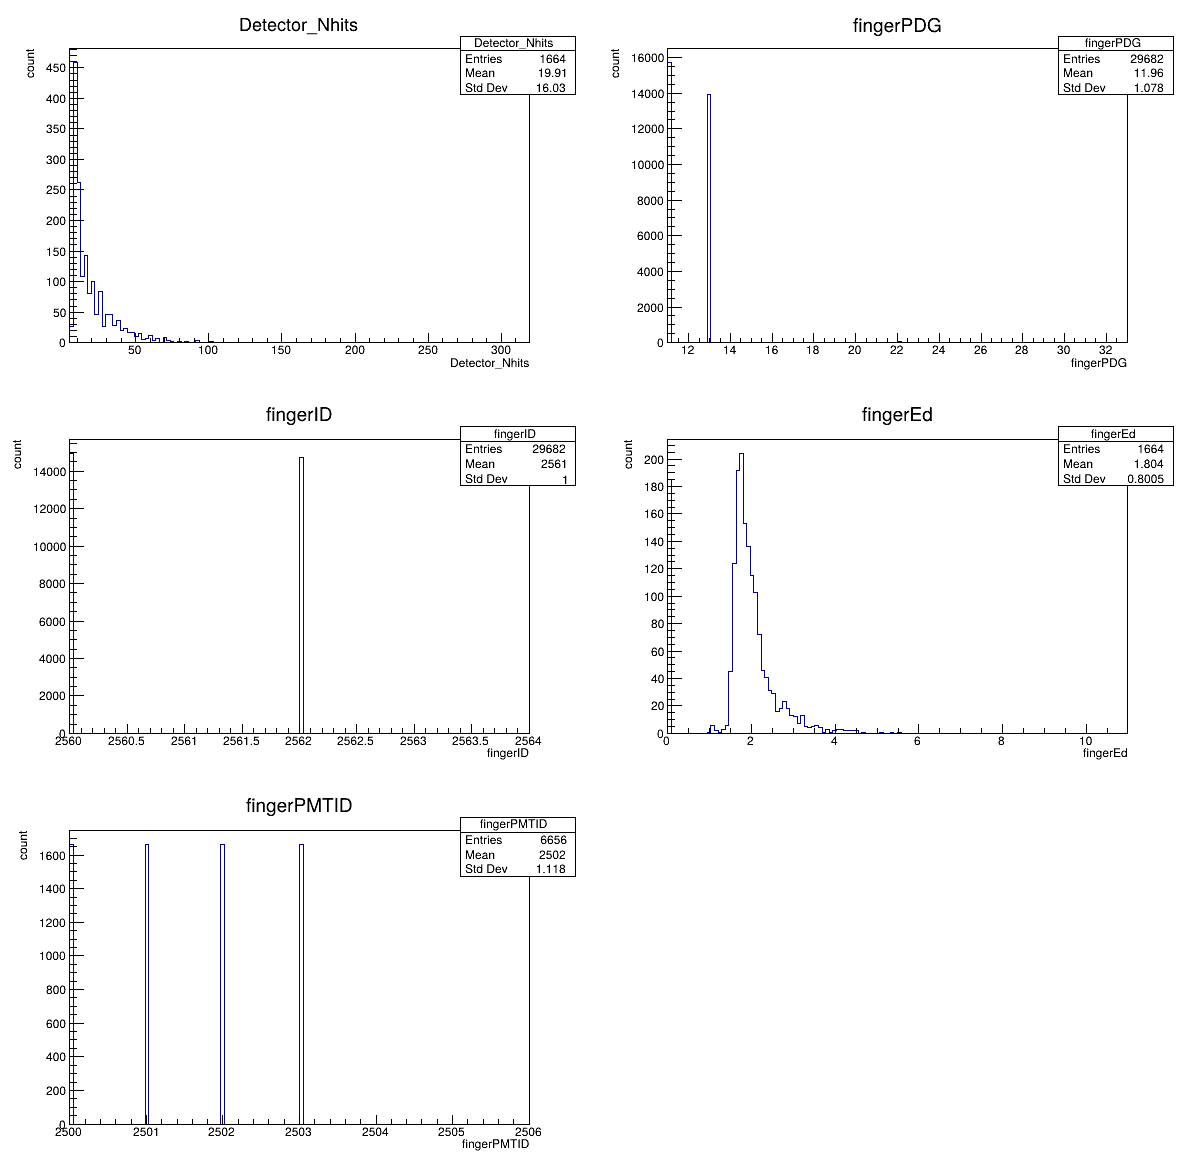

In [10]:
# Canvas 3

hDetectorNhits = fdft.Histo1D('Detector_Nhits')
hFingerPdg = fdft.Histo1D('fingerPDG')
hFingerID = fdft.Histo1D('fingerID')
hFingerEdep = fdft.Histo1D('fingerEd')
hFingerPMTID = fdft.Histo1D('fingerPMTID')
#hFingerPMTTime = fdft.Histo1D(("h1","t1",100,-1.1,4.0),'fingerPMTTime')

c3 = root.TCanvas("c3","c3",1200,1200)
c3.Divide(2,3,0.01,0.01,0)

c3.cd(1)
hDetectorNhits.Draw()
c3.cd(2)
hFingerPdg.Draw()
c3.cd(3)
hFingerID.Draw()
c3.cd(4)
hFingerEdep.Draw()
c3.cd(5)
hFingerPMTID.Draw()
c3.cd(6)
#hFingerPMTTime.Draw()

c3.Draw()
c3.Print("plots/c3.pdf")


StopIteration: <ExecutionResult object at 1427fa930, execution_count=11 error_before_exec=None error_in_exec=None info=<ExecutionInfo object at 1427fa900, raw_cell="## Canvas 33

hFingerAngleRad = fdft.Histo1D(("h1".." store_history=True silent=False shell_futures=True cell_id=5ba92bc4-0ace-4b01-a52d-31f8b35ed4ad> result=None>

Info in <TCanvas::Print>: pdf file plots/c33.pdf has been created


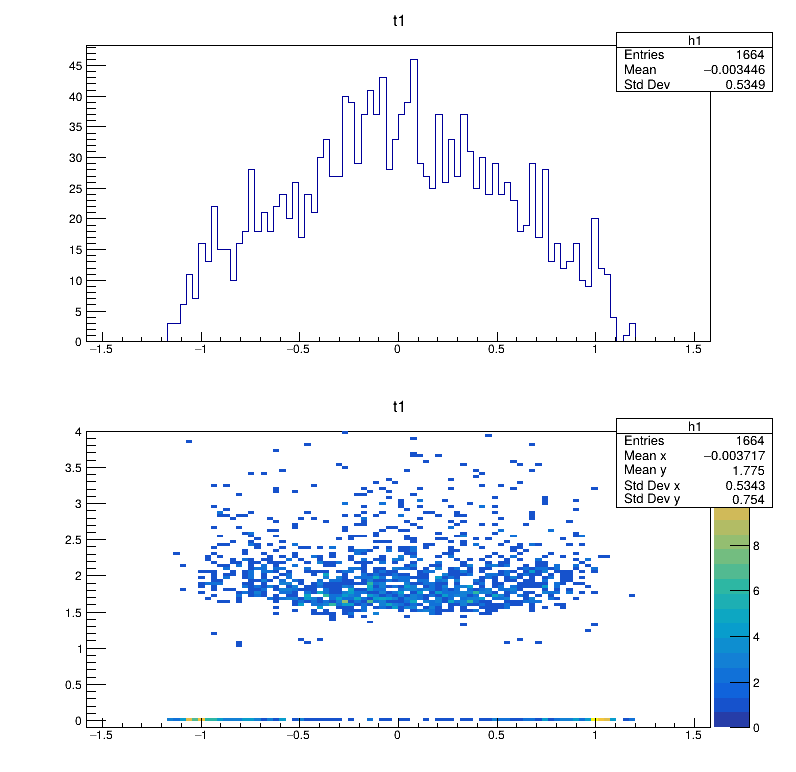

In [11]:
## Canvas 33

hFingerAngleRad = fdft.Histo1D(("h1","t1",100,-1.58,1.58),'fingerAngleRad')
hFingerEdepVsAngle = fdft.Histo2D(("h1","t1",100,-1.58,1.58,100,-0.1,4.0),'fingerAngleRad','fingerEd')

c33 = root.TCanvas("c33","c33",800,800)
c33.Divide(1,2,0.01,0.01,0)

c33.cd(1)
hFingerAngleRad.Draw()
c33.cd(2)
hFingerEdepVsAngle.Draw("COLZ")

c33.Draw()
c33.Print("plots/c33.pdf")

Info in <TCanvas::Print>: pdf file plots/c4.pdf has been created


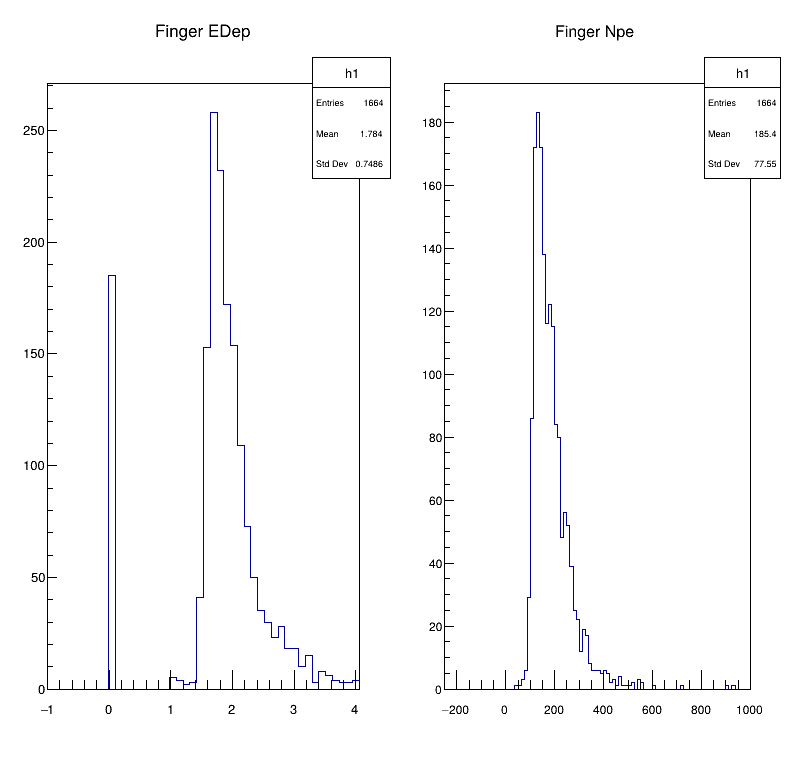

In [12]:
# Canvas 4

hFingerEd = fdft.Histo1D(("h1", "Finger EDep", 100, -1.0, 10.0),'fingerEd')
hFingerPMTNphot = fdft.Histo1D(("h1", "Finger Npe", 100, -250.0, 1000.0),'fingerPMTNPhotons')

c4 = root.TCanvas("c4","c4",800,800)

c4.cd()
pad = root.TPad("pad","pad",0.01,0.01,0.50,0.99)
pad.Draw()
pad.cd()
hFingerEd.GetXaxis().SetRangeUser(-1.0,4)
hFingerEd.Draw();

c4.cd()
pad = root.TPad("pad","pad",0.51,0.01,0.99,0.99)
pad.Draw()
pad.cd()
hFingerPMTNphot.GetXaxis().SetRangeUser(-250,1000)
hFingerPMTNphot.Draw()


c4.Draw()
c4.Print("plots/c4.pdf")

In [13]:
hFinger_Edep_vs_Nphot = fdft.Filter("trigger2").Histo2D(("h3", "Finger Edep vs Nphot", 100, 0.01, 500.0, 100, 0.01, 4.0),"fingerPMTNPhotons","fingerEd")

c7 = root.TCanvas("c7", "c7", 800, 800)
c7.Divide(2,1, 0.01, 0.01, 0)


#c7PE_MeV = root.TCanvas("c7PE_MeV", "c7PE_MeV", 800,800)
#c7Profile = root.TCanvas("c7Profile", "c7Profile", 800,800)

c7.cd(1)
hFinger_Edep_vs_Nphot.Draw("COLZ")
c7.cd(2)
prof = hFinger_Edep_vs_Nphot.ProfileX()
prof.Fit("pol1", "Q", "", 80, 400.0)

Error in <TFitResultPtr>: TFitResult is empty - use the fit option S
Error in <TFitResultPtr>: TFitResult is empty - use the fit option S
Error in <TFitResultPtr>: TFitResult is empty - use the fit option S
Error in <TFitResultPtr>: TFitResult is empty - use the fit option S
Error in <TFitResultPtr>: TFitResult is empty - use the fit option S
Error in <TFitResultPtr>: TFitResult is empty - use the fit option S
Error in <TFitResultPtr>: TFitResult is empty - use the fit option S
Error in <TFitResultPtr>: TFitResult is empty - use the fit option S
Error in <TFitResultPtr>: TFitResult is empty - use the fit option S
Error in <TFitResultPtr>: TFitResult is empty - use the fit option S
Error in <TFitResultPtr>: TFitResult is empty - use the fit option S
Error in <TFitResultPtr>: TFitResult is empty - use the fit option S
Error in <TFitResultPtr>: TFitResult is empty - use the fit option S
Error in <TFitResultPtr>: TFitResult is empty - use the fit option S
Error in <TFitResultPtr>: TFitResu

Info in <TCanvas::Print>: pdf file plots/c7.pdf has been created


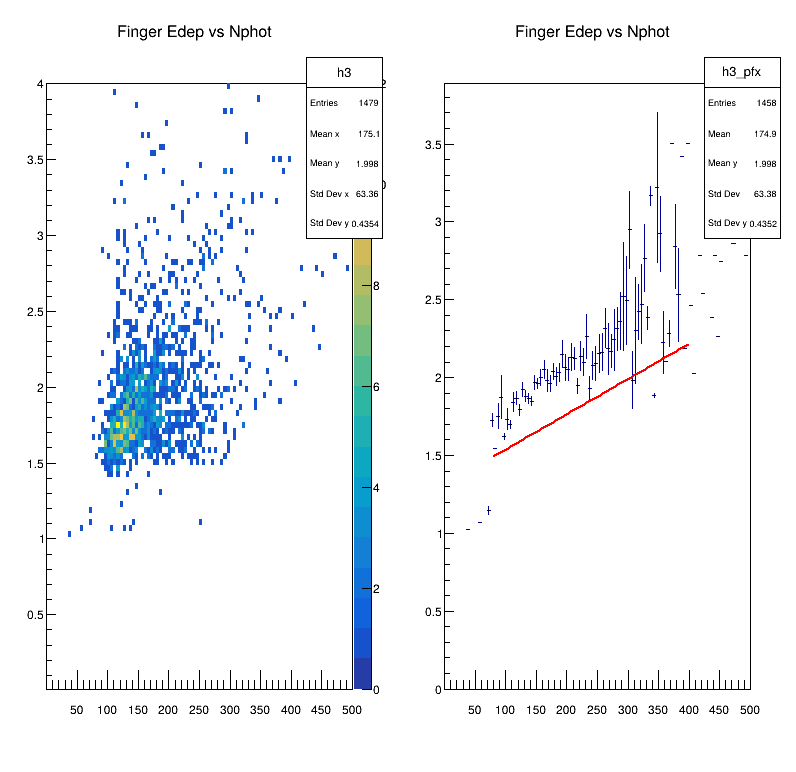

In [14]:
c7.Draw()
c7.Print("plots/c7.pdf")

In [15]:
hFinger_Edep_vs_NphotCut = fdft.Filter("trigger3").Histo2D(("h3", "Finger Edep vs Nphot", 100, 0.01, 500.0, 100, 0.01, 4.0),"fingerPMTNPhotons","fingerEd")

c8 = root.TCanvas("c8", "c8", 800, 800)
c8.Divide(2,1, 0.01, 0.01, 0)

#c7PE_MeV = root.TCanvas("c7PE_MeV", "c7PE_MeV", 800,800)
#c7Profile = root.TCanvas("c7Profile", "c7Profile", 800,800)

c8.cd(1)
hFinger_Edep_vs_NphotCut.Draw("COLZ")
c8.cd(2)
prof = hFinger_Edep_vs_NphotCut.ProfileX()
prof.Fit("pol1", "Q", "", 80, 400.0)

Error in <TFitResultPtr>: TFitResult is empty - use the fit option S
Error in <TFitResultPtr>: TFitResult is empty - use the fit option S
Error in <TFitResultPtr>: TFitResult is empty - use the fit option S
Error in <TFitResultPtr>: TFitResult is empty - use the fit option S
Error in <TFitResultPtr>: TFitResult is empty - use the fit option S
Error in <TFitResultPtr>: TFitResult is empty - use the fit option S
Error in <TFitResultPtr>: TFitResult is empty - use the fit option S
Error in <TFitResultPtr>: TFitResult is empty - use the fit option S
Error in <TFitResultPtr>: TFitResult is empty - use the fit option S
Error in <TFitResultPtr>: TFitResult is empty - use the fit option S
Error in <TFitResultPtr>: TFitResult is empty - use the fit option S
Error in <TFitResultPtr>: TFitResult is empty - use the fit option S
Error in <TFitResultPtr>: TFitResult is empty - use the fit option S
Error in <TFitResultPtr>: TFitResult is empty - use the fit option S
Error in <TFitResultPtr>: TFitResu

Info in <TCanvas::Print>: pdf file plots/c8.pdf has been created


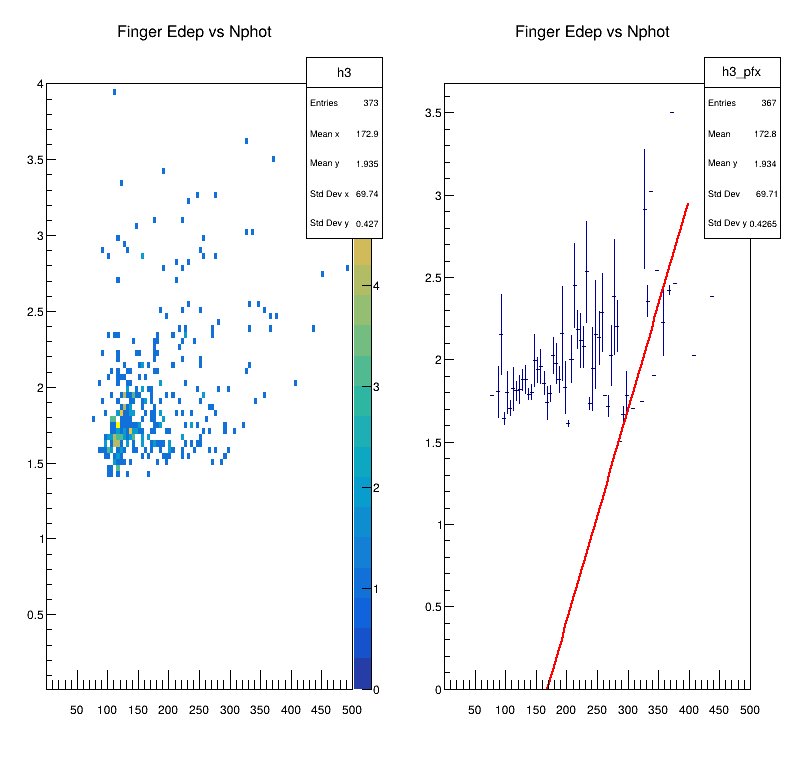

In [16]:
c8.Draw()
c8.Print("plots/c8.pdf")

Info in <TCanvas::Print>: pdf file plots/c12.pdf has been created


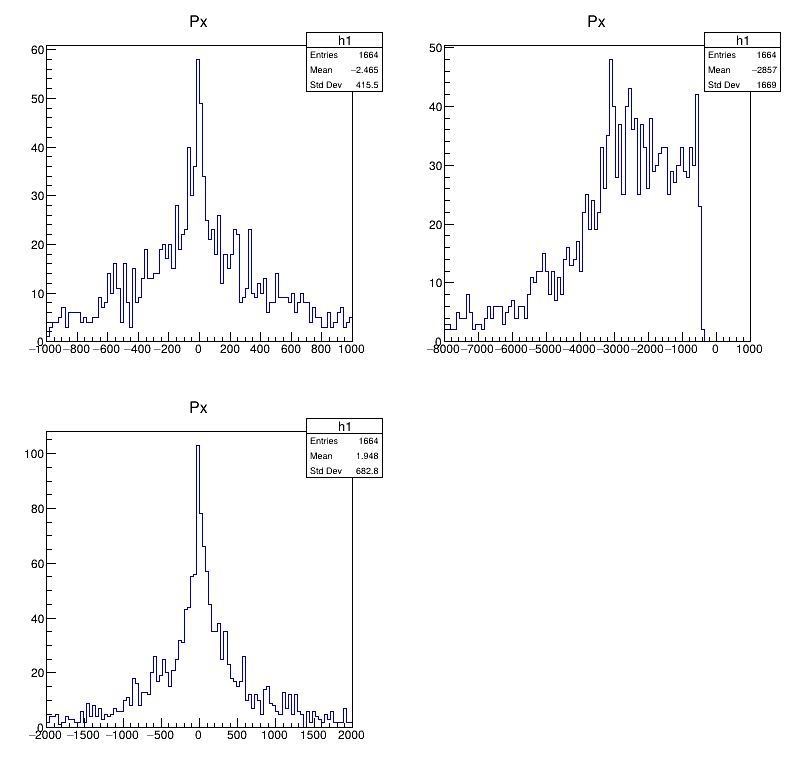

In [17]:
hPrimPx = fdft.Histo1D(("h1", "Px", 100, -1000, 1000),"fPx")
hPrimPy = fdft.Histo1D(("h1", "Px", 100, -8000, 1000),"fPy")
hPrimPz = fdft.Histo1D(("h1", "Px", 100, -2000, 2000),"fPz")

c12 = root.TCanvas("c12", "c12", 800,800)
c12.Divide(2,2, 0.01, 0.01, 0)

c12.cd(1)
hPrimPx.Draw()
c12.cd(2)
hPrimPy.Draw()
c12.cd(3)
hPrimPz.Draw()

c12.Draw()
c12.Print("plots/c12.pdf")

Info in <TCanvas::Print>: pdf file plots/c13.pdf has been created


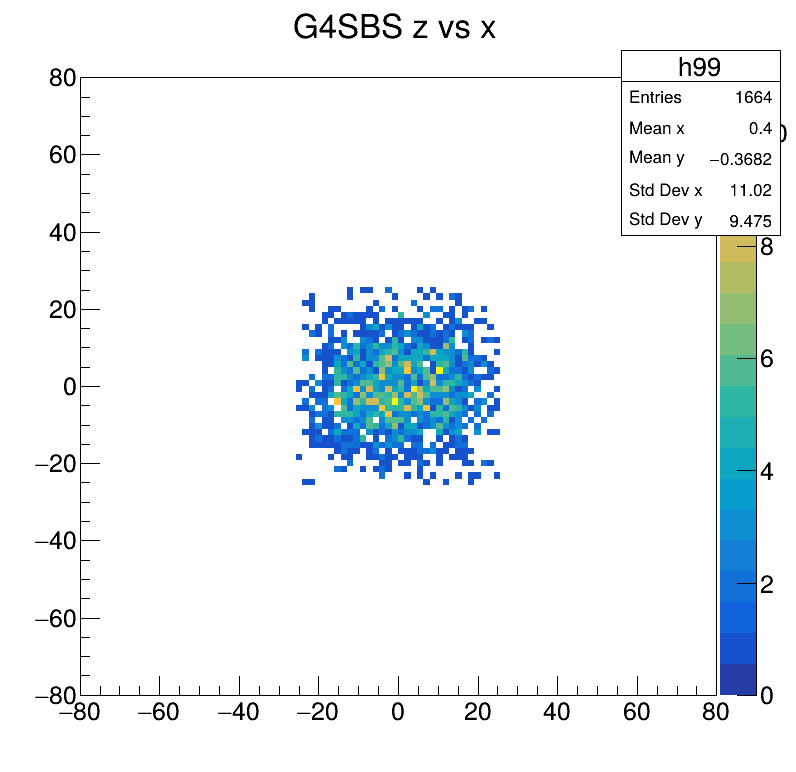

In [18]:
hPrimXZ = fdft.Histo2D(("h99", "G4SBS z vs x", 100, -80.0, 80.0, 100, -80.0, 80.0),"Prim_X","Prim_Z");
    
c13 = root.TCanvas("c13", "c13", 800, 800)

#plotDetector(hPrimXZ);
hPrimXZ.Draw('COLZ')

c13.Draw()
c3.Print("plots/c13.pdf")

Info in <TCanvas::Print>: pdf file plots/c14.pdf has been created


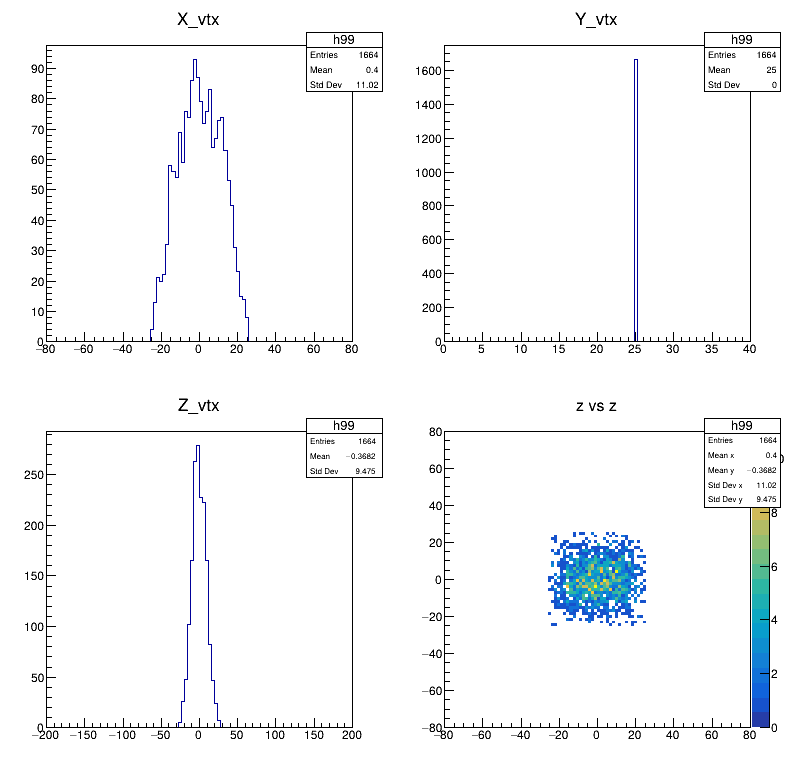

In [19]:
# Canvas 14
hPrimX = fdft.Histo1D(("h99","X_vtx", 100, -80,80),"Prim_X")
hPrimY = fdft.Histo1D(("h99","Y_vtx", 100, 0,40),"Prim_Y")
hPrimZ = fdft.Histo1D(("h99","Z_vtx", 100, -200,200),"Prim_Z")
hPrimXZ = fdft.Histo2D(("h99", "z vs z", 100, -80.0, 80.0, 100, -80.0, 80.0),"Prim_X","Prim_Z")

c14 = root.TCanvas("c14","c14",800,800)
c14.Divide(2,2,0.01,0.01,0)

c14.cd(1)
hPrimX.Draw()
c14.cd(2)
hPrimY.Draw()
c14.cd(3)
hPrimZ.Draw()
c14.cd(4)
hPrimXZ.Draw('COLZ')

c14.Draw()
c14.Print("plots/c14.pdf")

In [ ]:
t.stop()